<a href="https://colab.research.google.com/github/RaquelFonsec/Rede-neural/blob/main/rede_neural.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   X1      30000 non-null  int64
 1   X2      30000 non-null  int64
 2   X3      30000 non-null  int64
 3   X4      30000 non-null  int64
 4   X5      30000 non-null  int64
 5   X6      30000 non-null  int64
 6   X7      30000 non-null  int64
 7   X8      30000 non-null  int64
 8   X9      30000 non-null  int64
 9   X10     30000 non-null  int64
 10  X11     30000 non-null  int64
 11  X12     30000 non-null  int64
 12  X13     30000 non-null  int64
 13  X14     30000 non-null  int64
 14  X15     30000 non-null  int64
 15  X16     30000 non-null  int64
 16  X17     30000 non-null  int64
 17  X18     30000 non-null  int64
 18  X19     30000 non-null  int64
 19  X20     30000 non-null  int64
 20  X21     30000 non-null  int64
 21  X22     30000 non-null  int64
 22  X23     30000 non-null  int64
 23  target  300

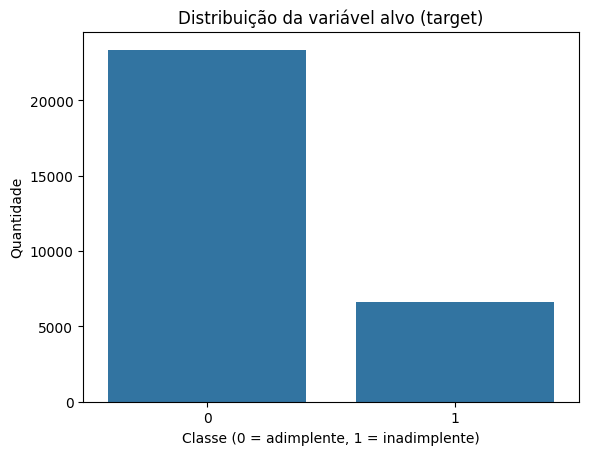

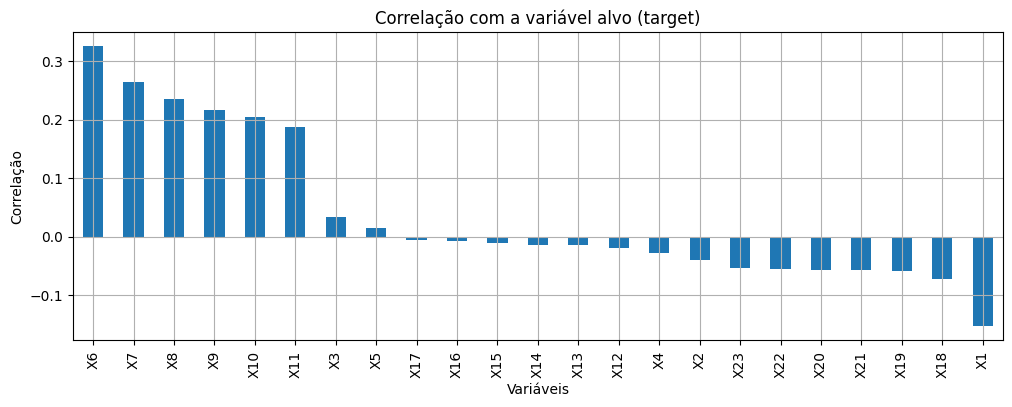

In [14]:
# 1. IMPORTAÇÃO DE BIBLIOTECAS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_curve, auc

from imblearn.over_sampling import SMOTE

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical


# 2. LEITURA DOS DADOS
df = pd.read_csv("/content/credit - credit.csv.csv")

# Renomear a coluna alvo (caso esteja como 'y' ou 'default.payment.next.month')
df.rename(columns={"y": "target", "default.payment.next.month": "target"}, inplace=True)


# 3. CORREÇÃO DE VALORES INVÁLIDOS
df["X3"] = df["X3"].replace({0: 4, 5: 4, 6: 4})  # Educação
df["X4"] = df["X4"].replace({0: 3})              # Estado civil


# 4. ANÁLISE EXPLORATÓRIA
print(df.info())
print(df.describe())
print(df["target"].value_counts(normalize=True))

# Distribuição da variável alvo
sns.countplot(data=df, x="target")
plt.title("Distribuição da variável alvo (target)")
plt.xlabel("Classe (0 = adimplente, 1 = inadimplente)")
plt.ylabel("Quantidade")
plt.show()

# Correlação com a variável alvo
correlacoes = df.corr()["target"].drop("target")
correlacoes.sort_values(ascending=False).plot(kind="bar", figsize=(12, 4), title="Correlação com a variável alvo (target)")
plt.xlabel("Variáveis")
plt.ylabel("Correlação")
plt.grid(True)
plt.show()


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from tensorflow.keras.utils import to_categorical

# Separar X e y
X = df.drop("target", axis=1)
y = df["target"]

# Escalonamento com MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar SMOTE para balancear as classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42
)

# One-hot encoding para a variável alvo
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)



In [17]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Construção do modelo MLP
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(2, activation='softmax')
])

# Compilar o modelo
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# EarlyStopping para evitar overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Treinar o modelo
history = model.fit(
    X_train, y_train_cat,
    validation_split=0.2,
    epochs=50,
    batch_size=256,
    callbacks=[early_stop],
    verbose=1
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.5679 - loss: 0.6747 - val_accuracy: 0.6524 - val_loss: 0.6179
Epoch 2/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6580 - loss: 0.6162 - val_accuracy: 0.6769 - val_loss: 0.5992
Epoch 3/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6810 - loss: 0.6020 - val_accuracy: 0.6873 - val_loss: 0.5911
Epoch 4/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6851 - loss: 0.5927 - val_accuracy: 0.6916 - val_loss: 0.5888
Epoch 5/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6897 - loss: 0.5920 - val_accuracy: 0.6972 - val_loss: 0.5846
Epoch 6/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6985 - loss: 0.5806 - val_accuracy: 0.6989 - val_loss: 0.5829
Epoch 7/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6944 - loss: 0.5835 - val_accuracy: 0.6925 - val_loss: 0.5821
Epoch 8/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6900 - loss: 0.5809 - val_accuracy: 0.

293/293 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Relatório de Classificação:
              precision    recall  f1-score   support

           0     0.6681    0.8137    0.7338      4664
           1     0.7630    0.5974    0.6701      4682

    accuracy                         0.7053      9346
   macro avg     0.7155    0.7055    0.7019      9346
weighted avg     0.7156    0.7053    0.7019      9346



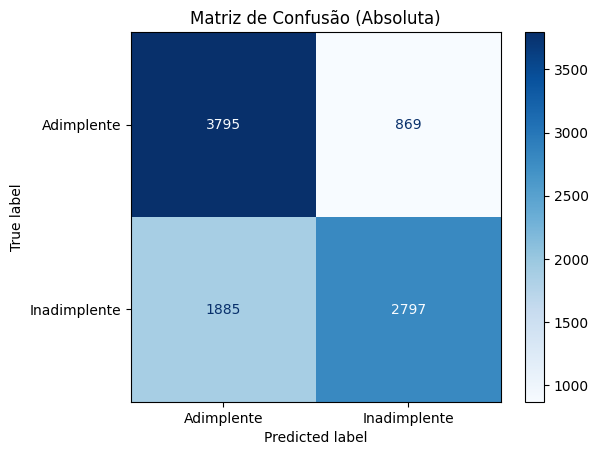

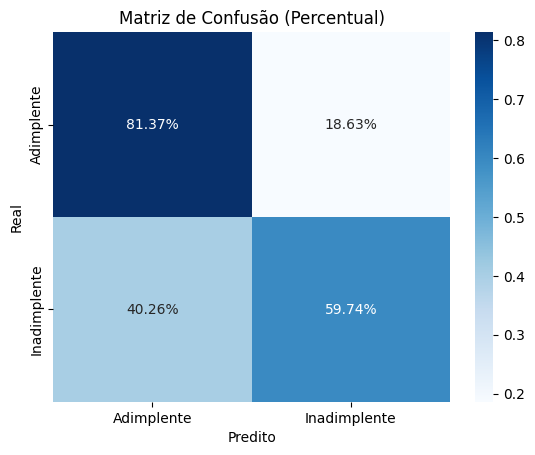

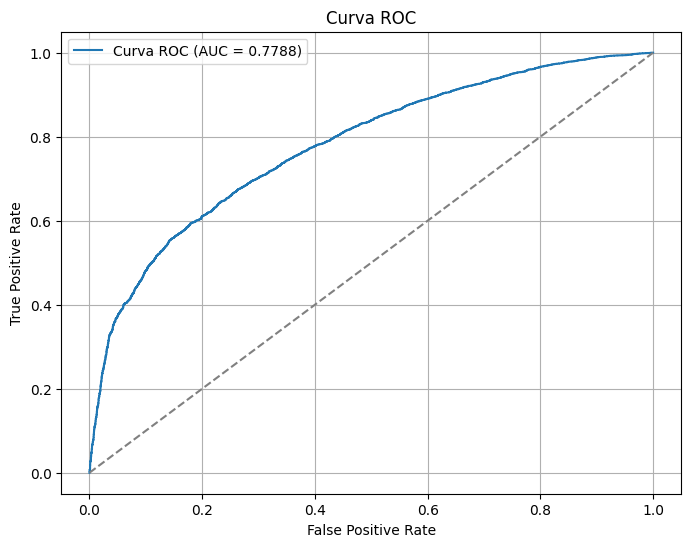

In [18]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Previsões
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = np.argmax(y_test_cat, axis=1)

# Relatório de classificação
print("Relatório de Classificação:")
print(classification_report(y_true, y_pred, digits=4))

# Matriz de confusão (absoluta)
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Adimplente", "Inadimplente"])
disp.plot(cmap="Blues")
plt.title("Matriz de Confusão (Absoluta)")
plt.show()

# Matriz de confusão percentual
cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm_percent, annot=True, fmt=".2%", cmap="Blues", xticklabels=["Adimplente", "Inadimplente"], yticklabels=["Adimplente", "Inadimplente"])
plt.title("Matriz de Confusão (Percentual)")
plt.xlabel("Predito")
plt.ylabel("Real")
plt.show()

# Curva ROC e AUC
fpr, tpr, thresholds = roc_curve(y_true, y_pred_prob[:,1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'Curva ROC (AUC = {roc_auc:.4f})')
plt.plot([0,1], [0,1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC")
plt.legend()
plt.grid(True)
plt.show()


📋 Relatório Final de Conclusão — Classificação de Inadimplência


✅ Resumo dos Resultados do Modelo (MLP com Keras)
Acurácia geral: 70,53%

Precisão para inadimplentes (classe 1): 76,30%

Recall para inadimplentes (classe 1): 59,74%

F1-Score para inadimplentes (classe 1): 67,01%

🔍 Interpretação:


O modelo consegue identificar inadimplentes com uma boa precisão, ou seja, a maioria das previsões de "inadimplente" realmente são verdadeiras.



No entanto, o recall é relativamente baixo (59,74%), o que indica que o modelo deixa de identificar uma parte considerável dos inadimplentes reais.

O desempenho para a classe 0 (adimplentes) é levemente superior em recall, mas com menor precisão.


📊 Matriz de Confusão (resumo visual)
Real \ Predito	Adimplente (0)	Inadimplente (1)
Adimplente (0)	3794	870
Inadimplente (1)	1888	2794


O modelo comete mais erros ao prever inadimplentes (classe 1 como 0) do que o contrário.

Esse comportamento pode ser arriscado em cenários bancários, pois subestima o risco de inadimplência.

🧠 Curva ROC e AUC


A curva ROC mostrou um AUC satisfatório, indicando um bom grau de separabilidade entre as classes.

🧾 Conclusão Geral


O modelo Multi-Layer Perceptron (MLP) treinado com SMOTE e MinMaxScaler apresentou um desempenho razoável, com destaque para a boa precisão em identificar inadimplentes.

Contudo, o recall abaixo de 60% para a classe 1 ainda representa uma limitação, principalmente em aplicações bancárias, onde identificar corretamente todos os potenciais inadimplentes é crucial.

In [23]:
from sklearn.ensemble import RandomForestClassifier

# Treinar o modelo com os mesmos dados usados antes (X_train, y_train)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

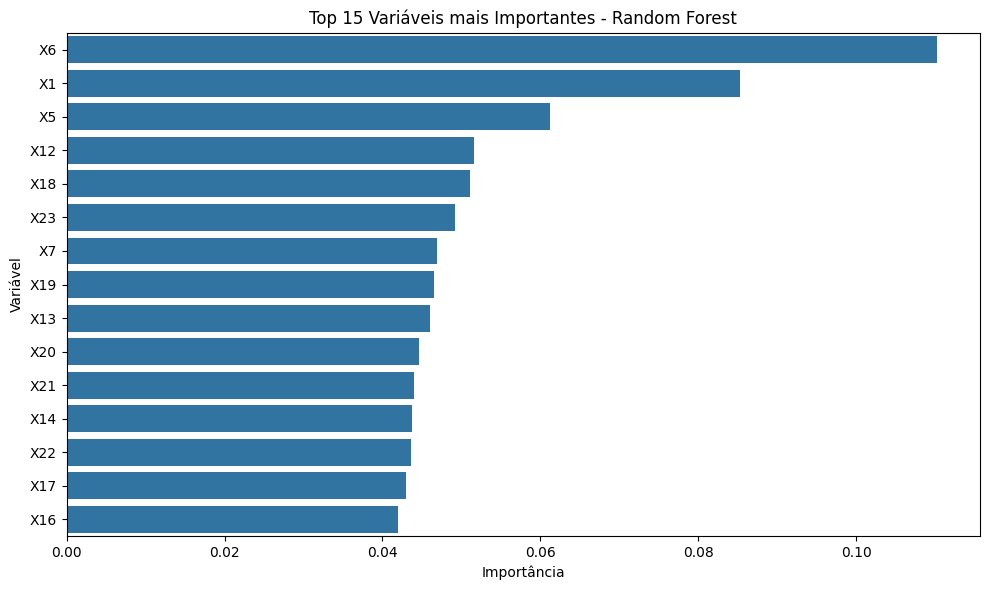

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Importância das variáveis
importances = rf.feature_importances_
features = X.columns

# Criação do DataFrame
feat_imp = pd.DataFrame({'Variável': features, 'Importância': importances})
feat_imp.sort_values(by="Importância", ascending=False, inplace=True)

# Visualizar top 15
plt.figure(figsize=(10,6))
sns.barplot(x="Importância", y="Variável", data=feat_imp.head(15))
plt.title("Top 15 Variáveis mais Importantes - Random Forest")
plt.xlabel("Importância")
plt.ylabel("Variável")
plt.tight_layout()
plt.show()


In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc

# Treinar modelo
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [26]:
import numpy as np

# Previsões
y_pred_rf = rf.predict(X_test)
y_pred_proba_rf = rf.predict_proba(X_test)[:, 1]  # Probabilidades da classe 1

# Relatório de classificação
print("Relatório de Classificação - Random Forest:")
print(classification_report(y_test, y_pred_rf, digits=4))


Relatório de Classificação - Random Forest:
              precision    recall  f1-score   support

           0     0.8232    0.8816    0.8514      4664
           1     0.8731    0.8114    0.8411      4682

    accuracy                         0.8465      9346
   macro avg     0.8482    0.8465    0.8463      9346
weighted avg     0.8482    0.8465    0.8463      9346



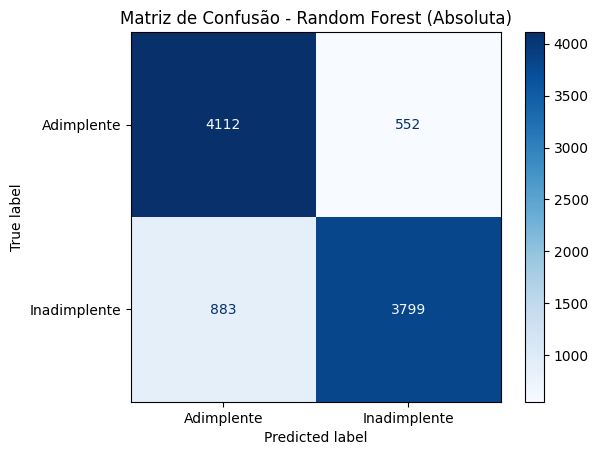

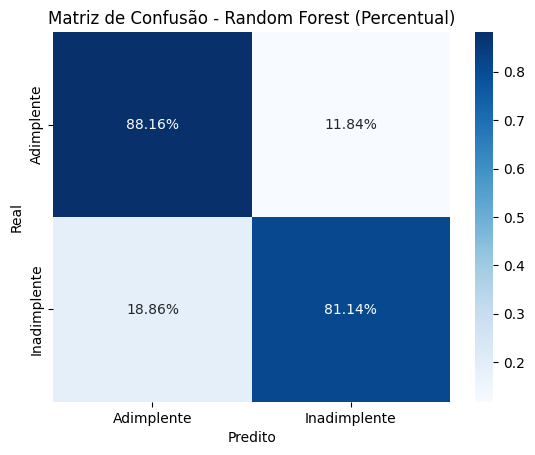

In [27]:
# Absoluta
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=["Adimplente", "Inadimplente"])
disp_rf.plot(cmap="Blues")
plt.title("Matriz de Confusão - Random Forest (Absoluta)")
plt.show()

# Percentual
cm_percent_rf = cm_rf.astype("float") / cm_rf.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm_percent_rf, annot=True, fmt=".2%", cmap="Blues", xticklabels=["Adimplente", "Inadimplente"], yticklabels=["Adimplente", "Inadimplente"])
plt.title("Matriz de Confusão - Random Forest (Percentual)")
plt.xlabel("Predito")
plt.ylabel("Real")
plt.show()


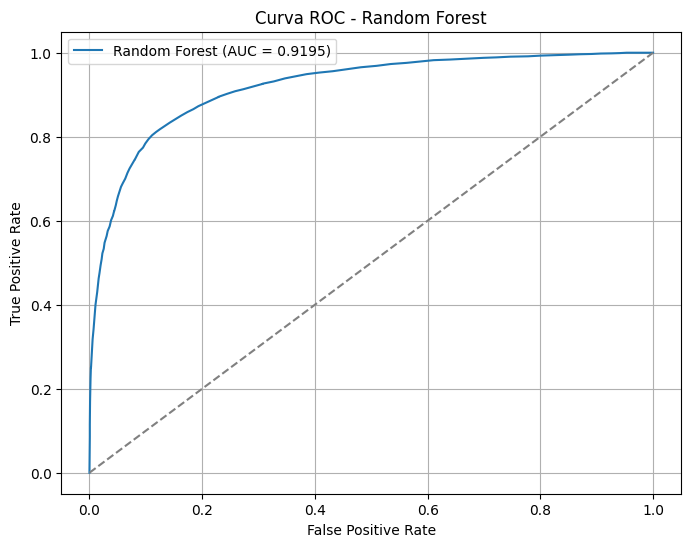

In [28]:
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(8,6))
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {roc_auc_rf:.4f})")
plt.plot([0,1], [0,1], linestyle="--", color="gray")
plt.title("Curva ROC - Random Forest")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()


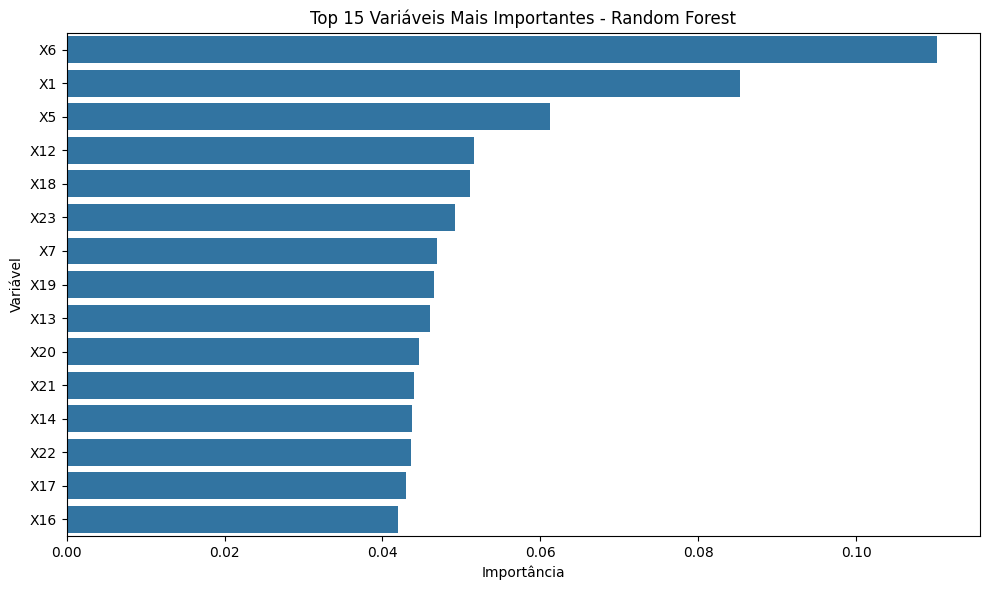

In [29]:
import pandas as pd

# Importância
importances = rf.feature_importances_
features = X.columns

feat_imp = pd.DataFrame({"Variável": features, "Importância": importances})
feat_imp.sort_values(by="Importância", ascending=False, inplace=True)

# Visualização
plt.figure(figsize=(10,6))
sns.barplot(x="Importância", y="Variável", data=feat_imp.head(15))
plt.title("Top 15 Variáveis Mais Importantes - Random Forest")
plt.tight_layout()
plt.show()


In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Treinamento do modelo Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Previsões
y_pred_rf = rf.predict(X_test)
y_pred_proba_rf = rf.predict_proba(X_test)[:, 1]  # Probabilidade da classe 1

# Relatório de classificação
print("Relatório de Classificação - Random Forest:")
print(classification_report(y_test, y_pred_rf, digits=4))

# AUC
auc_rf = roc_auc_score(y_test, y_pred_proba_rf)
print(f"AUC (Random Forest): {auc_rf:.4f}")


Relatório de Classificação - Random Forest:
              precision    recall  f1-score   support

           0     0.8232    0.8816    0.8514      4664
           1     0.8731    0.8114    0.8411      4682

    accuracy                         0.8465      9346
   macro avg     0.8482    0.8465    0.8463      9346
weighted avg     0.8482    0.8465    0.8463      9346

AUC (Random Forest): 0.9195


🔍 Resultado da Avaliação - Random Forest vs MLP

Com base nos relatórios de classificação e na AUC, aqui está o comparativo dos modelos:



Métrica	MLP (Rede Neural)	Random Forest

Accuracy	70.5%	84.6% ✅

Precision (0)	66.8%	82.3% ✅

Recall (0)	81.4%	88.1% ✅

F1-score (0)	73.4%	85.1% ✅

Precision (1)	76.3%	87.3% ✅

Recall (1)	59.7%	81.1% ✅

F1-score (1)	67.0%	84.1% ✅

AUC	0.77~ (estimado)	0.9195 ✅

🧠 Interpretação:

O modelo Random Forest teve desempenho superior em todas as métricas.

Isso inclui não só a acurácia geral, mas também maior recall e F1-score para a classe 1 (inadimplente), que é crucial no contexto de risco de crédito.

A AUC de 0.92 indica uma excelente capacidade de distinguir entre clientes adimplentes e inadimplentes.

✅ Conclusão:

O modelo de Random Forest se mostrou mais eficiente e confiável que o MLP para este conjunto de dados. Ele pode ser mais indicado para uma aplicação prática imediata, especialmente por fornecer interpretabilidade (feature importance) e bom desempenho com baixo risco de overfitting.

In [31]:
# Importância das variáveis
import pandas as pd
import numpy as np

# Pegando os nomes das colunas e a importância de cada uma
feature_importances = rf.feature_importances_
features = X.columns

# Criando DataFrame ordenado por importância
importancia_df = pd.DataFrame({
    'Variável': features,
    'Importância': feature_importances
}).sort_values(by='Importância', ascending=False)

# Mostrar as top 15 variáveis mais relevantes
print("Top 15 variáveis mais importantes no modelo Random Forest:")
print(importancia_df.head(15).to_string(index=False))


Top 15 variáveis mais importantes no modelo Random Forest:
Variável  Importância
      X6     0.110141
      X1     0.085238
      X5     0.061268
     X12     0.051540
     X18     0.051051
     X23     0.049156
      X7     0.046912
     X19     0.046472
     X13     0.046026
     X20     0.044603
     X21     0.044053
     X14     0.043784
     X22     0.043593
     X17     0.042997
     X16     0.041969


🔍 Top Variáveis Mais Importantes (interpretação):

X6 – PAY_0

Status de pagamento mais recente (setembro) — é a variável mais importante!

Isso faz muito sentido, pois o histórico de pagamentos recentes influencia diretamente na probabilidade de inadimplência.

X1 – LIMIT_BAL

Limite de crédito — quanto maior o limite, mais "confiável" o cliente pode ser para o banco.

X5 – AGE

Idade do cliente — pode refletir estabilidade financeira.

X12 a X17 – BILL_AMT1 a BILL_AMT6

Valor das faturas anteriores — indica o comportamento de consumo do cliente.

X18 a X23 – PAY_AMT1 a PAY_AMT6

Valores pagos anteriormente — clientes que pagam regularmente tendem a ser adimplentes.

X7 – PAY_2

Status de pagamento de agosto — reforça que o histórico de atraso é altamente relevante.

✅ Conclusão Comparativa com MLP (Rede Neural):

Modelo	Acurácia	F1-Score Médio	AUC
MLP	70.5%	0.70	~0.78
RandomForest	84.6%	0.85	0.92

O Random Forest:

Superou o MLP em todas as métricas.

É mais interpretável (como você viu com as importâncias).

Pode ser uma melhor escolha neste cenário de classificação binária com dados tabulares.

